In [1]:
import cv2
import numpy as np
import matplotlib.image as mimg 
import matplotlib.pyplot as plt

In [2]:
# Instead BGR, we get the image directly in the form of RGB using matplotlib.image 
img=mimg.imread("lane_car.jpg")         
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

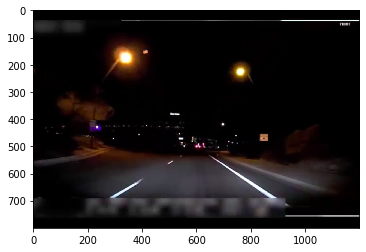

In [3]:
# Plotting the image
plt.imshow(img)

In [12]:
# Checking the shape of the image
img.shape

(800, 1200, 3)

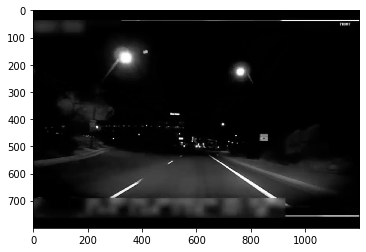

In [5]:
# Converting the image into grayscale
gray_img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  
plt.imshow(gray_img, cmap="gray")

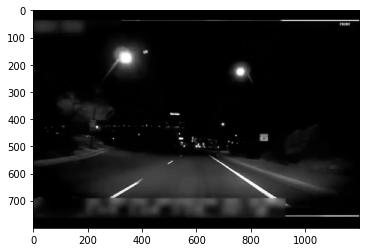

In [6]:
# Blurring the image
blur=cv2.GaussianBlur(gray_img,(7,7),0)
plt.imshow(blur,cmap='gray')

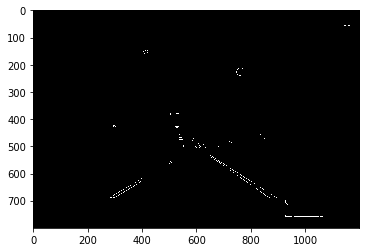

In [7]:
# To detect the edges 
canny=cv2.Canny(blur,100,200)
plt.imshow(canny, cmap='gray')

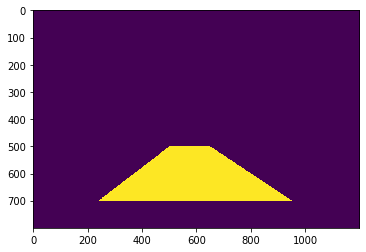

In [8]:
# Creating the region of interest
mask=np.zeros_like(gray_img)
vertices=np.array([[(240,700),(500,500),(650,500),(950,700)]], dtype=np.int32)
cv2.fillPoly(mask,vertices,(255,0))
plt.imshow(mask)

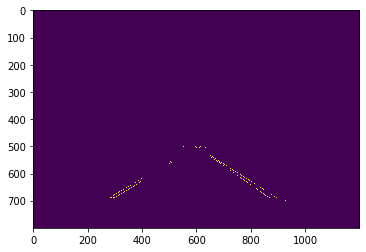

In [9]:
# Conjucting 2 images mask and canny
masking=cv2.bitwise_and(canny,mask)
plt.imshow(masking)

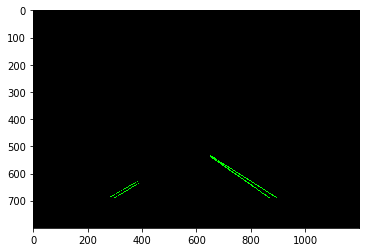

In [18]:
# Using the Hough Transformation method to detect the line
lines=cv2.HoughLinesP(masking,1,np.pi/180,100,minLineLength=50,maxLineGap=10)
line_image=np.zeros((masking.shape[0],masking.shape[1],3),dtype=np.uint8)
for line in lines:
    for x1,y1,x2,y2  in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(line_image)

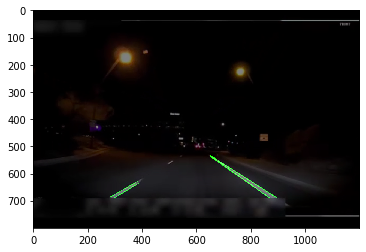

In [19]:
# Creating original and detected lines
coll=cv2.addWeighted(img,0.5,line_image,1.5,0)
plt.imshow(coll)